In [7]:
import numpy as np
import matplotlib.pyplot as plt

$$
    \rho_P(r) = \frac{3M_0}{4\pi a^3} \left( 1 + \frac{r^2}{a^2} \right)^{-\frac{5}{2}}
$$

$$
    M(r) = \frac{M_0 r^3}{(r^2+a^2)^{3/2}}
$$


Dividing by the total mass $M_0$ we get

$$
    r(\mu) = a \left( \mu^{-2/3}-1\right)^{-1/2}
$$

We can then sample the radia. We can also sample $\theta$ and $\phi$ knowing that we have spherical simmetry. Then we convert to cartesian coordinates.

In [32]:
N = 1000
M = 1
a = 1

cdf_r = uniform.rvs(0, 1, size=N)
r = a*(cdf_r**(-2/3)-1)**(-0.5)

cdf_theta = uniform.rvs(0, 1, size=N) 
theta = np.arccos(1 - 2 * cdf_theta)

phi = uniform.rvs(0, 2 * np.pi, size=N) 

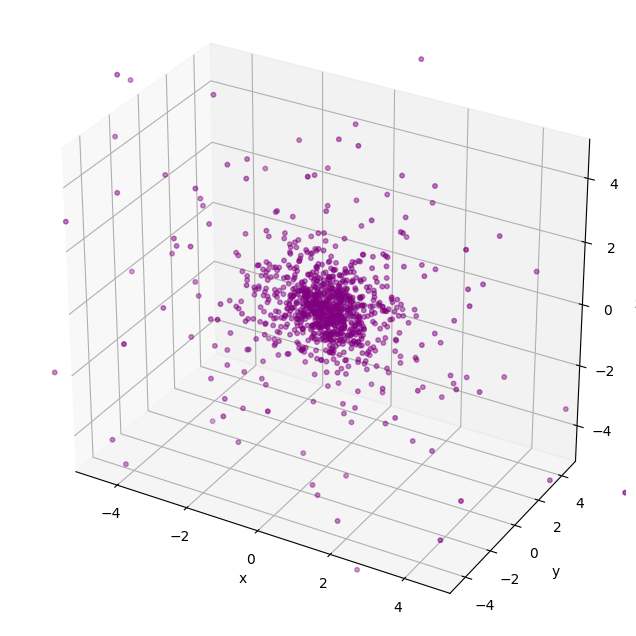

In [33]:
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'purple', s=10.5)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
plt.show();

We can then compute the potential for all our particles and then sample the energies from $f(\varepsilon)$ to recover the initial velocities.

$$ 
    \psi(r) = -\frac{GM_0}{\sqrt{r^2+a^2}}
$$

$$ 
    f(\varepsilon) = \frac{24\sqrt{2}}{7\pi^3} \frac{a^2}{G^5M_0^4}\varepsilon^{7/2}
$$

We have to sample the specific energies using a Monte Carlo rejection method, because we are unable to invert the cdf function.

In [25]:
psi = -M/((r**2+a**2)**0.5)

